# Chapter02 데이터의 이해 
데이터 과학을 위한 파이썬 머신러닝

- <a href="#02.1피처란">02.1 피쳐란</a>
- <a href="#02.2피처의종류">02.2 피처의 종류</a>
- <a href="#03.데이터를모델에대입하기">02.2 데이터를 모델에 대입하기</a>

---------------

### 라이브러리 설치

In [ ]:
!pip install numpy

In [2]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/53/c3/f8e87361f7fdf42012def602bfa2a593423c729f5cb7c97aed7f51be66ac/pandas-2.0.3-cp38-cp38-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.0.3-cp38-cp38-macosx_11_0_arm64.whl.metadata (18 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.0.3-cp38-cp38-macosx_11_0_arm64.whl (10.7 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)


In [4]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/85/44/2b91e75fd133393e76455bb3ac44b9b885668264eafb0f9510f6aeb41fb5/matplotlib-3.7.2-cp38-cp38-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a4/67/ab422872caf036e95c764b25163619da59c35e34cc70c166c0250a05900e/contourpy-1.1.0-cp38-cp38-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/70/91/14082609dbdc53c7bd517c70d7a4b9fe404bd77228fd163bd2a1dde548ac/fonttools-4.42.1-cp38-cp38-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 7.4 MB/s eta 0:00:00
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/2e/db/501d8e0452e025e3ae7140439efab43789eb251e5cd8ed962297d565a301/kiwisolver-1.4.5-cp38-cp38-macosx_11_0_arm64.whl.metadata
  Obtaining dep

In [8]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 9.7 MB/s eta 0:00:00


In [9]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 4.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [5]:
import numpy as np
import pandas as pd
import matplotlib
print(f'numpy version : {np.__version__}')
print(f'pandas version : {pd.__version__}')
print(f'matplotlib version : {matplotlib.__version__}')

numpy version : 1.22.3
pandas version : 2.0.3
matplotlib version : 3.7.2


In [6]:
# 그래프 크기와 한글 폰트 지정하기
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4,3)
# plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우용 '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

# # for Mac notebook (맥에서 한글 폰트 사용)
from matplotlib import rc
rc('font', family='AppleGothic')

[참고] Tex 기호: https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:TeX_%EB%AC%B8%EB%B2%95

------------------------------

## <a name="02.1피처란">02.1 피쳐란</a> 

### 1. 피쳐(feature)의 개념 
- 머신러닝에서 피처는 데이터의 특성을 나타내는 것
- 데이터 표에서 열(column)을 지칭함
- 머신러닝 모델이 패턴을 학습하고, 예측이나 분류를 수행하는 데 필요한 입력 데이터임
- 피쳐의 선택과 전처리가 머신러닝 모델의 성능에 중요한 영향을 미침

#### @보스턴주택가격 데이터
다운로드: https://www.kaggle.com/altavish/boston-housing-dataset?select=HousingData.csv
<br>
| 필드명 | 설명 | 값 종류 |
|:------|:------|------|
|**CRIM** |자치시(town)별 1인당 범죄율 |	|
|ZN |25,000평방 피크를 초과하는 거주지역의 비율  |	|
|INDUS |비소매상업지역이 점유하고 있는 토지의 비율  |	|
|CHAS |찰스강 인접여부  |0=No, 1=Yes	|
|NOX |10ppm당 농축 일산화질소  |	|
|RM |주택 1가구당 평균 방의 개수  |	|
|AGE |1940년 이전에 건축된 소유주택의 비율  |	|
|DIS |5개의 보스턴 직업센터까지의 접근성 지수  |	|
|RAD |방사형 도로까지의 접근성 지수  |	|
|TAX |10,000 달러 당 재산세율  |	|
|PTRATIO |자치시(town)별 학생/교사 비율  |	|
|B |1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율  |	|
|LSTAT |모진답의 하위계층의 비율(%)  |	|
|MEDV |본인 소유의 주택가격(중앙값) (단위: $1,000)  |	|

### [참고] 머신러닝 모델 예:
$y = f(x)$<br>
$y = ax + b$<br>

- **x : 독립변수(independent variable)** : 다른 변수에 영향을 주는 변수, 설명변수(explanatory variable)
- **y : 종속변수(dependent variable)** : 영향을 받는 변수, 반응변수(response variable)

### [참고] 회귀분석(regression analysis)
- 변수가 **다른 변수에 영향을 미치는 관계를 식별**하기 위한 통계적 방법
- 두 변수 간의 관계를 파악하여 **한 변수의 값으로부터 그에 대응하는 다른 변수의 값을 예측**하고자 할 때 사용하는 통계적 방법

### $y_i = ax_i + b +  e_i$    
&nbsp;&nbsp;&nbsp;단순선형회귀모형(simple linear regression model) : 직선회귀모형<br>
 - $a, b$ : 모회귀계수
 - $x_i$  : 독립변수(설명변수)
 - $y_i$  : 종속변수(반응변수)
 - $e_i$  : $N(0,\sigma^2)$을 따르는 확률변수(오차항) <br>
**==> 모회귀계수 $a, b$를 추정함으로서 회귀직선을 추정할 수 있다!**

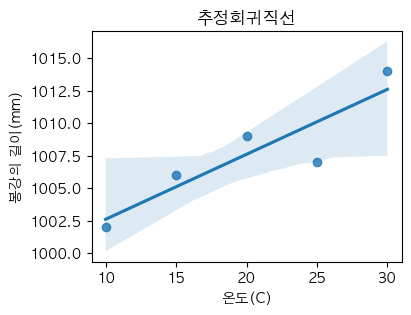

기울기 : 0.50   y절편 : 997.60  
추정회귀직선 : y = 0.50x + 997.60
--------------------------------------------------
SSE :  14.7000 , n : 5
평균제곱오차:오차항의 분산𝜎2의 추정량(S2)   :  4.9000
오차항의 분산𝜎2에 대한 추정값의 표준오차(S) :  2.2136
결정계수 R-squared :  0.8096


In [10]:
# 1.추정회귀직선 상관도 그리기
def draw_linear_regression(a, b, xlabel='X', ylabel='Y'):
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.regplot(x=df.X, y=df.Y) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('추정회귀직선')
    plt.show()    
  
 
# 2.추정회귀직선 회귀식 구하기 
def get_linear_regression_equation(a, b):
    import numpy as np
    
    z = np.polyfit(a, b, 1)   # 기울기(a)와 절편(b) 구하기 (Least squares polynomial)
    f = np.poly1d(z)          # f(x) : x값에 따른 y값을 구할 때 사용함
    print(f'기울기 : {z[0]:.2f}   y절편 : {z[1]:.2f}  ')
    print(f'추정회귀직선 : y = {z[0]:.2f}x + {z[1]:.2f}')
    print('-'*50)
#     return z, f


# 3.결정계수, 오차항의 분산 𝜎2의 추정량(MSE)구하기
def get_linear_regression_value(a, b, df):
    from statsmodels.formula.api import ols   # ols(Ordinary Least Squares): 선형 모형 계수 추정 방법

    model = ols('df.Y ~ df.X', data=df).fit() # ols('종속변수명 ~ C(독립변수명)+C(독립변수명)..', data=데이터프레임객체)
    target_array = df.Y
    target_pred1 = model.predict()
    
    # 직접 계산식 이용하는 경우
    SST = np.sum((target_array - np.mean(target_array))**2)  # SST(편차의 제곱, 총변동), 
    SSR = np.sum((target_pred1 - np.mean(target_array))**2)  # SSR(편차와 잔차의 차이 제곱 : 회귀식으로 설명가능한 변동), 
    SSE = np.sum((target_array - target_pred1)**2)           # SSE(잔차의 제곱, 오차제곱합 : 회귀식으로 설명하지 못하는 변동)
    MSE = SSE / (len(target_array) - 2)                   # MSE(평균제곱오차: 오차항의 분산 𝜎2의 추정량 S2)
    S   = np.sqrt(MSE)                                    # S = 오차항의 분산 𝜎2에  대한 추정값의 표준오차 
    r_squared = (1 - (SSE/SST))                           # 결정계수

    print(f'SSE : {SSE : .4f} , n : {len(target_array)}')
    print(f'평균제곱오차:오차항의 분산𝜎2의 추정량(S2)   : {MSE : .4f}')
    print(f'오차항의 분산𝜎2에 대한 추정값의 표준오차(S) : {S : .4f}')
    print(f'결정계수 R-squared : {r_squared : .4f}')    
#     #모델 이용하는 경우
#     SSE = sum((model.resid) ** 2)               # 모델 이용
#     print(f'결정계수: {model.rsquared: .4f}')   # 모델 이용
 
    
# 단순선형회귀모형을 가정할 때     
data = {'X':[10, 15, 20, 25, 30],
        'Y':[1002, 1006, 1009, 1007, 1014]}

df = pd.DataFrame(data)

# 1.추정회귀직선 상관도 그리기
draw_linear_regression(df.X, df.Y, xlabel='온도(C)', ylabel='봉강의 길이(mm)')

# 2.추정회귀직선 회귀식 구하기
get_linear_regression_equation(df.X, df.Y)

# 3.오차항의 분산 𝜎2 추정
get_linear_regression_value(df.X, df.Y, df)

### 2. 피쳐의 표기법
- 데이터 테이블(data table) : 데이터를 테이블(표)로 표현한 것
- 피쳐(feature) : 데이터 테이블 상에서 하나의 열 이름(column name)에 해당
- 데이터 인스턴스(data instance) : 데이터 테이블 상에서 하나의 행(row)에 해당, 튜플(tuple)이라고도 부름<br>
#### $y = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_{13}x_{13} +w_0$ X 1   
&nbsp;&nbsp;&nbsp;선형대수 표기법으로 표현하면<br>
$y = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_{13}x_{13} +w_0x_0 = \sum_{i=1}^13 = w_ix_i = W^TX$ (내적: dot product)

### [참고] 벡터와 행렬

In [12]:
import numpy as np

# numpy에서 행벡터처럼 출력하기 = 1차 행렬
data = [1,2,3]
data1= np.array(data)
print(data1)
print(data1.shape)

[1 2 3]
(3,)


In [13]:
# 브로드 캐스트(broadcast)
data = np.array([[1,2],[3,4]])
print(data * 10)
print('-'*30)

data1 = np.array([[1,2],[3,4]])
data2 = np.array([10,20])
print(data1 * data2)

[[10 20]
 [30 40]]
------------------------------
[[10 40]
 [30 80]]


In [14]:
# 벡터 내적
data1 = np.array([1,2,3])  # 벡터
data2 = np.array([4,5,6])  # 벡터
print(f'벡터 내적: {data1 @ data2}')      
print(f'벡터 내적: {np.dot(data1, data2)}')  
print('-'*30)

# 행렬의 곱
data1 = np.array([1,2])
data2 = np.array([[1,1,1],[2,2,2]])
print(f'행렬 곱: {np.dot(data1, data2)}')  
print('-'*30)

data1 = np.array([[1,1,1],[2,2,2]])
data2 = np.array([1,2,3])
print(f'행렬 곱: {np.dot(data1, data2)}')  

data1 = np.array([[1,2],[3,4]])
data2 = np.array([[5,6],[7,8]])
print(f'행렬 곱: {np.dot(data1, data2)}')  

벡터 내적: 32
벡터 내적: 32
------------------------------
행렬 곱: [5 5 5]
------------------------------
행렬 곱: [ 6 12]
행렬 곱: [[19 22]
 [43 50]]


In [15]:
# CNN(Convolutional Neural Networks): 합성곱 연산의 원리
import numpy as np

def getFeatureMap(data, mask):
    result = []
    x, y   = np.shape(data)
    fx, fy = np.shape(mask)
    for i in range(x-fx+1):
        for j in range(y-fy+1):
            result.append((data[i:i+fy, j:j+fy] * mask).sum())    

    return np.array(result).reshape(2,2)  


# input array
data = np.array([[1,2,2,0],
              [0,1,2,3],
              [1,0,1,2],
              [2,3,0,1]])
# convolution kernel(==filter==mask)
mask = np.array([[0,0,0],
              [0,1,0],
              [0,0,0]])

# Feature Map(합성곱결과) 만들기
result = getFeatureMap(data, mask)

print(f'#input :\n{data}')
print(f'#convolution kernel:\n{mask}')
print(f'#feature map:\n{result}')
print(f'#max pooling:\n{np.max(result)}') # Feature Map에서 map pooling 값 얻기

#input :
[[1 2 2 0]
 [0 1 2 3]
 [1 0 1 2]
 [2 3 0 1]]
#convolution kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
#feature map:
[[1 2]
 [0 1]]
#max pooling:
2


-----------------

## <a name="02.2피처의종류">02.2 피처의 종류</a>

### 1. 데이터의 분류

| 분류 |연속형 데이터(continuous data) | 이산형 데이터(discrete data) |
|:------|:---|:---|
| 설명 | 값이 끊어지지 않고 계속 연결되는 종류의 데이터로<br>실수와 관련된 값 | 연속적 값이 아니라 분리해서 표현하는 데이터로<br>일종의 라벨로 구분 가능 |
| 데이터 예 | 온도, 자동차의 속도|우편번호(숫자로 표현), 성별(텍스트로 표현)|
| |평균, 분산 등 통계적 기법 적용 가능|텍스트 형태의 값도 숫자 형태로 바꾸어 수식의 $x_i$에 할당|



### 2. 데이터를 모델에 적용할 때 고려사항

--------------

## <a name="03.데이터를모델에대입하기">02.2 데이터를 모델에 대입하기</a>

### 1. 데이터 테이블의 기본 용어
- 데이터 테이블(data table) : 데이터를 테이블(표)로 표현한 것
- 피쳐(feature) : 데이터 테이블 상에서 하나의 열 이름(column name)에 해당
- 데이터 인스턴스(data instance) : 데이터 테이블 상에서 하나의 행(row)에 해당, 튜플(tuple)이라고도 부름

### 2. 판다스로 데이터 다루기

#### 2.1 데이터 불러오기

In [16]:
# (1) pandas 모듈 호출
import pandas as pd 
# (2) 데이터 URL을 변수 data_url에 넣기
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data' 
# (3) csv 데이터 로드
df_data = pd.read_csv(data_url, sep='\s+', header = None) 
# (4) 데이터의 열 이름 지정
df_data.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO' ,'B', 'LSTAT', 'MEDV'] 
# (5) 데이터 출력
print(f'CHAS : {set(df_data.CHAS)}')
print(f'RAD  : {set(df_data.RAD)}')
print(f'df_data.shape  : {df_data.shape}')
df_data.head()  # 앞에서 5개 출력

CHAS : {0, 1}
RAD  : {1, 2, 3, 4, 5, 6, 7, 8, 24}
df_data.shape  : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


| 필드명 | 설명 | 값 종류 |
|:------|:------|------|
|**CRIM** |자치시(town)별 1인당 범죄율 |	|
|ZN |25,000평방 피크를 초과하는 거주지역의 비율  |	|
|INDUS |비소매상업지역이 점유하고 있는 토지의 비율  |	|
|CHAS |찰스강 인접여부  |0=No, 1=Yes	|
|NOX |10ppm당 농축 일산화질소  |	|
|RM |주택 1가구당 평균 방의 개수  |	|
|AGE |1940년 이전에 건축된 소유주택의 비율  |	|
|DIS |5개의 보스턴 직업센터까지의 접근성 지수  |	|
|RAD |방사형 도로까지의 접근성 지수  |	|
|TAX |10,000 달러 당 재산세율  |	|
|PTRATIO |자치시(town)별 학생/교사 비율  |	|
|B |1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율  |	|
|LSTAT |모진답의 하위계층의 비율(%)  |	|
|MEDV |본인 소유의 주택가격(중앙값) (단위: $1,000)  |	|

#### 2.2 데이터에 수식 적용하기

In [ ]:
import numpy as np                    # (1) numpy 모듈 호출

df_data['weight_0'] = 1                # (2) weight 0 값 추가
df_data = df_data.drop("MEDV", axis=1) # (3) Y 값 제거
df_matrix = df_data.values             # (4) 행렬(Matrix) 데이터로 변환하기
weight_vector = np.random.random_sample((14, 1)) # (5) 가중치 w 생성 : 0~1사이의 임의의 실수 14행 1열로 생성
df_matrix.dot(weight_vector)                # (6) 내적 연산 실행 결과 출력